The necessary libraries are imported.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Function definition

We define the function malla_círculo, which takes as parameters two positive integers m and n, with the first one being the number of concentric circles that will be used in the grid, and the second one the number of transverse cuts that will be made in the grid, meaning n-1 is the number of pieces.

In [1]:
def circle_grid(m,n):
    grid = np.empty((m,n))
    return grid

For subsequent calculations and without loss of generality, we will consider that the radio in the grid take values $r\in\left\{\frac{1}{m},\frac{2}{m},\ldots,1\right\}$, while the angles will be $\theta\in\left\{0,\frac{2\pi}{n},\frac{2\pi}{n}\cdot2,\ldots,\frac{2\pi}{n}(n-1)\right\}$ 

The function *est_var_ang* estimates the angular variogram according to the following:
\begin{equation}
\hat{\gamma^*}\left(\theta_k=\frac{2\pi}{n}k\right)=\frac{1}{mn}\sum_{r=1}^m\sum_{i=0}^{n-1}\left(X\left(rA\left(\frac{2k\pi}{n}(i+1)\right)\mathbf{e}\right)-X\left(rA\left(\frac{2k\pi}{n}i\right)\mathbf{e}\right)\right)^2,
\end{equation}
where $k<n$.

In [23]:
def est_var_ang(grid,k):
    m = np.size(grid,0)
    n = np.size(grid,1)
    est = 0
    for r in range(m):
        for i in range(n):
            est += (grid[r,(i+k)%n]-grid[r,i])**2
    return est/(2*m*n)

The function *est_var_ang_cr* estimates the angular cross-variogram according to the formula
\begin{equation}
\hat{\gamma^*}_{XY}\left(\theta_k=\frac{2\pi}{n}k\right)=\frac{1}{mn}\sum_{r=1}^m\sum_{i=0}^{n-1}\left(X\left(rA\left(\frac{2k\pi}{n}(i+1)\right)\mathbf{e}\right)-X\left(rA\left(\frac{2k\pi}{n}i\right)\mathbf{e}\right)\right)\left(Y\left(rA\left(\frac{2k\pi}{n}(i+1)\right)\mathbf{e}\right)-Y\left(rA\left(\frac{2k\pi}{n}i\right)\mathbf{e}\right)\right),
\end{equation}
where $k<n$.

If the dimensions of the grids are not the same, it is reported and nothing is calculated.

In [24]:
def est_var_ang_cr(grid_1, grid_2, k):
    m_1 = np.size(grid_1,0)
    n_1 = np.size(grid_1,1)
    m_2 = np.size(grid_2,0)
    n_2 = np.size(grid_2,1)
    if (m_1 == m_2) and (n_1 == n_2):
        est = 0
        for r in range(m_1):
            for i in range(n_1):
                est += (grid_1[r,(i+k)%n]-grid_1[r,i])*(grid_2[r,(i+k)%n]-grid_2[r,i])
        return est/(2*m_1*n_1)
    else:
        print("The dimensions of the grids do not match.")

The function *est_pseudovar_ang_cr* estimates the angular pseudo cross-variogram using the following formula:
\begin{equation}
\hat{\gamma^{c*}}_{XY}\left(\theta_k=\frac{2\pi}{n}k\right)=\frac{1}{mn}\sum_{r=1}^m\sum_{i=0}^{n-1}\left(X\left(rA\left(\frac{2k\pi}{n}(i+1)\right)\mathbf{e}\right)-Y\left(rA\left(\frac{2k\pi}{n}i\right)\mathbf{e}\right)\right)^2,
\end{equation}
where $k>n$.

If the dimensions of the grids are not the same, it is reported and nothing is calculated.

In [25]:
def est_pseudovar_ang_cr(grid_1, grid_2, k):
    m_1 = np.size(grid_1,0)
    n_1 = np.size(grid_1,1)
    m_2 = np.size(grid_2,0)
    n_2 = np.size(grid_2,1)
    if (m_1 == m_2) and (n_1 == n_2):
        est = 0
        for r in range(m_1):
            for i in range(n_1):
                est += (grid_1[r,(i+k)%n]-grid_2[r,i])**2
        return est/(m_1*n_1)
    else:
        print("The dimensions of the grids do not match.")

In [26]:
def est_covar_ang_cr(grid_1, grid_2, k):
    m_1 = np.size(grid_1,0)
    n_1 = np.size(grid_1,1)
    m_2 = np.size(grid_2,0)
    n_2 = np.size(grid_2,1)
    if (m_1 == m_2) and (n_1 == n_2):
        est = 0
        mean_1 = np.mean(grid_1)
        mean_2 = np.mean(grid_2)
        for r in range(m_1):
            for i in range(n_1):
                est += (grid_1[r,i]-mean_1)*(grid_2[r,(i+k)%n]-mean_2)
        return est/(m_1*n_1)
    else:
        print("The dimensions of the grids do not match.")

We define the function *plot_grid* which plots the grid with its corresponding values on a grayscale.

In [27]:
def plot_grid(grid):
    m = np.size(grid,0)
    n = np.size(grid,1)
    
    coord_r = [(i+1)/m for i in range(m)]
    coord_a = [2*np.pi*i/n for i in range(n)]

    coord = np.empty((m*n,2))
    colors = np.empty(m*n)

    contador = 0
    for r in range(m):
        for i in range(n):
            coord[contador,:] = np.array([coord_r[r], coord_a[i]])
            colors[contador] = grid[r,i]
            contador += 1
    
    fig = plt.figure()
    ax = fig.add_subplot(projection='polar')
    c = ax.scatter(coord[:,1], coord[:,0], c = colors, cmap = 'binary')

The function *plot_var_ang* draws the curve generated when calculating the angular variogram as a function of the angle.

In [28]:
def var_ang(grid):
    n = np.size(grid,1)
    list_var = list()
    
    ang = list()

    for i in range(n):
        list_var.append(est_var_ang(grid,i+1))
        ang.append(2*np.pi*(i+1)/n)
    
    return list_var

In [39]:
def plot_var_ang(grid):
    list_var = var_ang(grid)
    n = np.size(grid,1)
    ang = [2*np.pi*(i+1)/n for i in range(n)]
    fig = plt.figure()
    plt.plot(ang,list_var)
    plt.ylim((-3,0.5))
    plt.xlabel("Angle [rad]")
    plt.ylabel("Angular Variogram")
    plt.title("Angular Variogram Grid")
    plt.show()
    return list_var

Similarly, *plot_var_ang_cr* plots the curve obtained when calculating the angular cross-variogram using different values of $k$.

In [37]:
def plot_var_ang_cr(grid_1, grid_2):
    n_1 = np.size(grid_1,1)
    n_2 = np.size(grid_2,1)
    
    ang = list()
    
    if n_1 == n_2:
        list_var = list()
        for i in range(n-1):
            list_var.append(est_var_ang_cr(grid_1,grid_2,i+1))
            ang.append(2*np.pi*(i+1)/n)
        fig = plt.figure()
        plt.plot(ang,list_var)
        plt.ylim((-3,0.5))
        plt.xlabel("Angle [rad]")
        plt.ylabel("Angular Cross-Variogram")
        plt.title("Angular Cross-Variogram Grid")
        plt.show()
        return list_var
    else:
        print("The dimensions of the grids do not match.")

Likewise, *plot_pseudovar_ang_cr* draws the angular pseudo cross-variogram as a function of the angle.

In [30]:
def plot_pseudovar_ang_cr(grid_1, grid_2):
    n_1 = np.size(grid_1,1)
    n_2 = np.size(grid_2,1)
    
    ang = list()
    
    if n_1 == n_2:
        list_var = list()
        for i in range(n-1):
            list_var.append(est_pseudovar_ang_cr(grid_1,grid_2,i+1))
            ang.append(2*np.pi*(i+1)/n)
        plt.plot(ang,list_var)
        return list_var
    else:
        print("The dimensions of the grids do not match.")

In [31]:
def plot_covar_ang_cr(malla_1, malla_2):
    n_1 = np.size(malla_1,1)
    n_2 = np.size(malla_2,1)
    
    ang = list()
    
    if n_1 == n_2:
        list_var = list()
        for i in range(n-1):
            list_var.append(est_covar_ang_cr(malla_1,malla_2,i+1))
            ang.append(2*np.pi*(i+1)/n)
        plt.plot(ang,list_var)
        return list_var
    else:
        print("Las dimensiones de las mallas no coinciden")

In [32]:
def plot_codisp_ang_cr(malla_1, malla_2):
    n_1 = np.size(malla_1,1)
    n_2 = np.size(malla_2,1)
    
    ang = list()
    
    if n_1 == n_2:
        list_var = list()
        for i in range(n-1):
            if est_var_ang(malla_1,i+1)*est_var_ang(malla_2,i+1) == 0:
                print('¡Denominador nulo!')
            list_var.append(est_var_ang_cr(malla_1,malla_2,i+1)/np.sqrt(est_var_ang(malla_1,i+1)**2*est_var_ang(malla_2,i+1)**2))
            ang.append(2*np.pi*(i+1)/n)
        plt.plot(ang,list_var)
        return list_var
    else:
        print("Las dimensiones de las mallas no coinciden")

*rotate_grid* receives a grid and returns its rotation by the angle $rot$.

In [33]:
def rotate_grid(grid, rot):
    m = np.size(grid,0)
    n = np.size(grid,1)
    
    if rot < n:
        grid_rot = np.empty((m,n))
        grid_rot[:,rot:] = grid[:,:-rot]
        grid_rot[:,:rot] = grid[:,-rot:]
        return grid_rot
    else:
        print("It is not possible to rotate at the angle "+str(2*np.pi*rot/n))

# Examples

Firstly, we set values for $m$ and $n$, which will be used for all the examples.

In [8]:
m = 18
n = 360

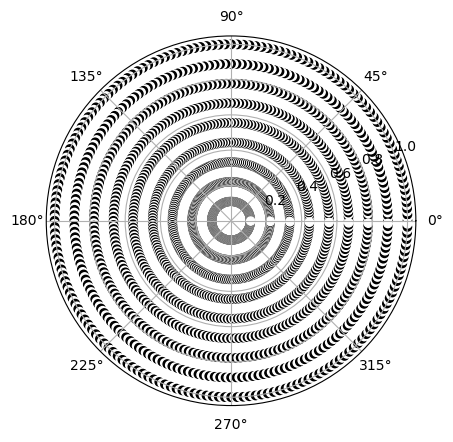

In [12]:
grid_ej = np.zeros((m,n))

for i in range(n):
    for r in range(m):
        if i%2==0:
            if r%2==1:
                grid_ej[r,i] = 1

plot_grid(grid_ej)

In [15]:
est_var_ang(grid_ej,1)

0.25

In [16]:
rot = 30

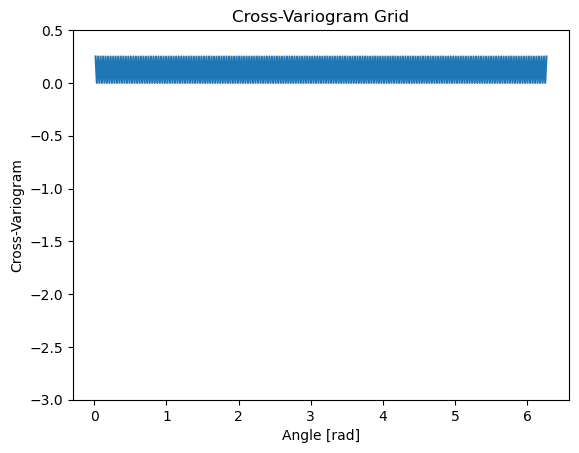

Effective rotation angle: 0.3277777777777778

Minimum value:0.0
Index: 1
Angle: 0.011111111111111112

Maximum value:0.0
Index: 2
Angle: 0.016666666666666666


In [21]:
values = plot_var_ang_cr(grid_ej, rotate_grid(grid_ej,rot))

print('Effective rotation angle: '+str(2*(59)/n)+'\n')
ind_min = values.index(min(values))
print('Minimum value:' +str(values[ind_min])+'\nIndex: '+str(ind_min)+'\nAngle: '+str(2*(ind_min+1)/n)+'\n')
values.remove(values[ind_min])
ind_2_min = values.index(min(values))
print('Maximum value:' +str(values[ind_2_min])+'\nIndex: '+str(ind_2_min)+'\nAngle: '+str(2*(ind_2_min+1)/n))

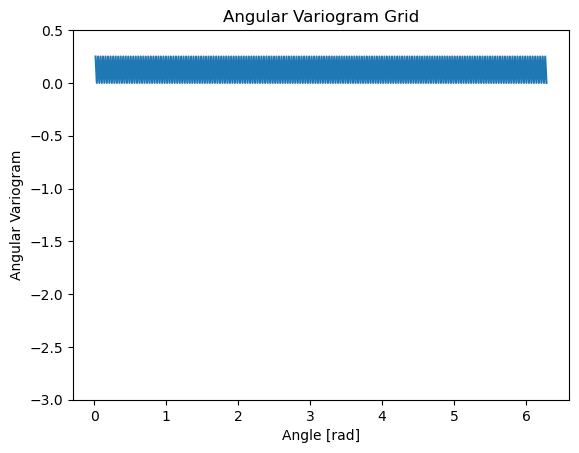

0.25

In [40]:
plot_var_ang(grid_ej)[0]

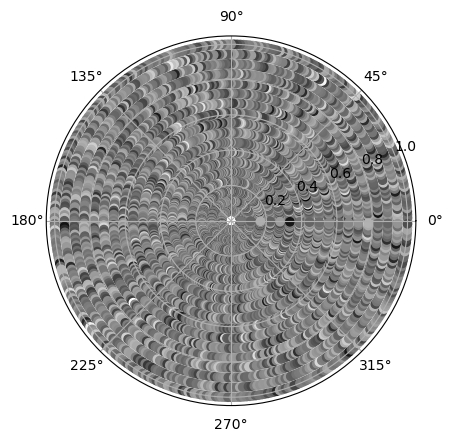

In [42]:
grid_norm = np.random.normal(0,1,size=(m,n))

plot_grid(grid_norm)

In [43]:
est_var_ang_cr(rotate_grid(grid_norm,rot), grid_norm,rot)

-0.4979069159360056

In [44]:
est_var_ang(grid_norm,2*rot)/2

0.5042987805809934

In [45]:
est_var_ang(grid_norm,rot)

1.002205696516998

In [46]:
est_var_ang(grid_norm,2*rot)/2-est_var_ang(grid_norm,rot)

-0.49790691593600467

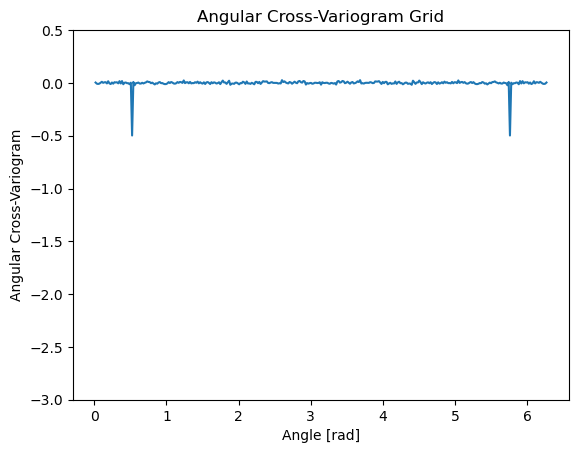

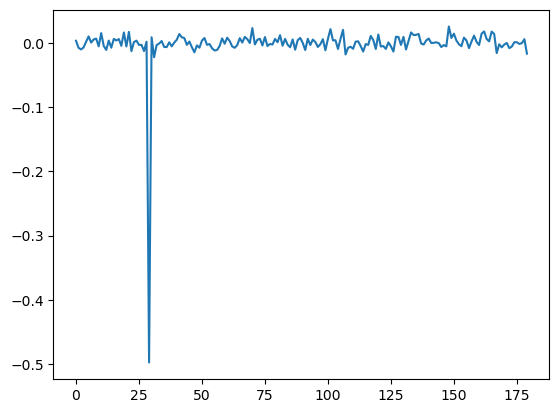

In [47]:
plt.plot(plot_var_ang_cr(grid_norm, rotate_grid(grid_norm, 30))[:180])

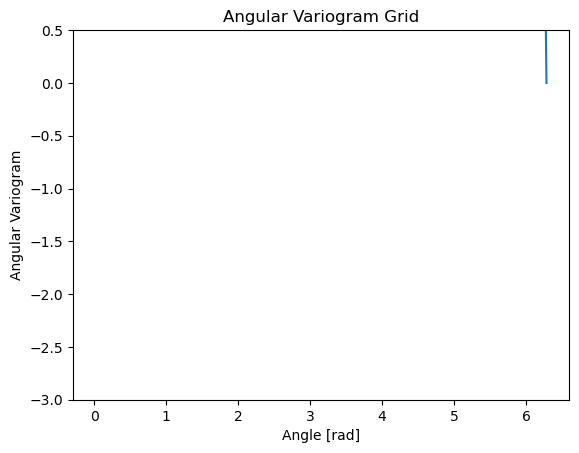

1.0153422585967877

In [48]:
plot_var_ang(grid_norm)[0]

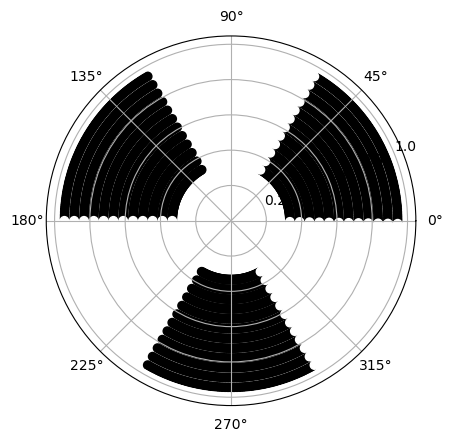

In [49]:
toxic_grid = np.zeros((m,n))

for r in range(m-6):
    for i in range(n//6):
        toxic_grid[r+5,i] = 1
        toxic_grid[r+5,i+(n//6)*2] = 1
        toxic_grid[r+5,i+(n//6)*4] = 1

plot_grid(toxic_grid)

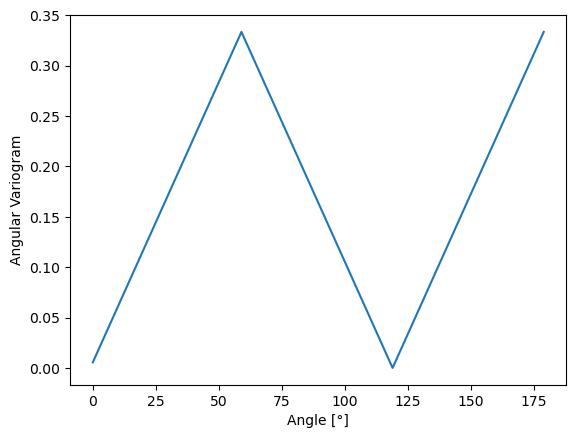

In [50]:
plt.xlabel("Angle [°]")
plt.ylabel("Angular Variogram")
plt.plot(var_ang(toxic_grid)[:180])

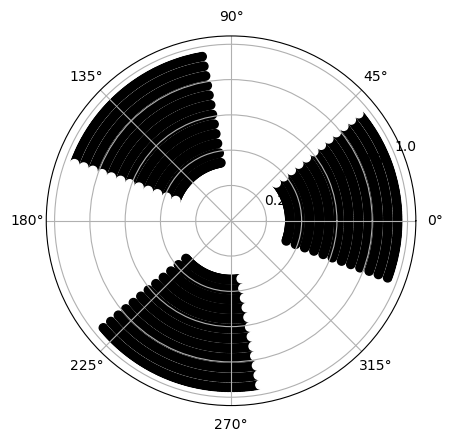

In [51]:
plot_grid(rotate_grid(toxic_grid,100))

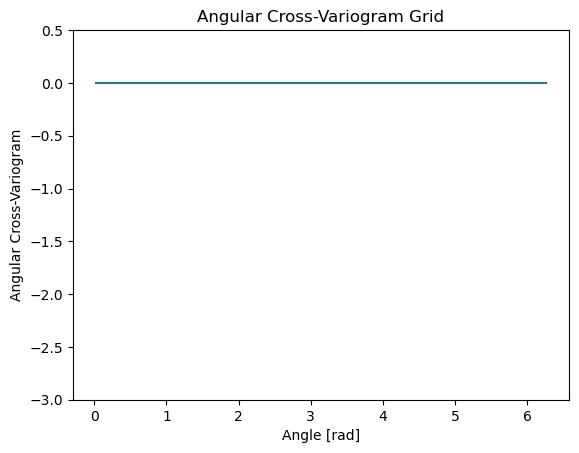

Effective rotatio angle: 0.3277777777777778

Minimum value:0.0
Index: 0
Angle: 0.005555555555555556

Maximum value:0.0
Index: 0
Angle: 0.005555555555555556


In [53]:
values = plot_var_ang_cr(toxic_grid, rotate_grid(toxic_grid,rot))

print('Effective rotatio angle: '+str(2*(59)/n)+'\n')
ind_min = values.index(min(values))
print('Minimum value:' +str(values[ind_min])+'\nIndex: '+str(ind_min)+'\nAngle: '+str(2*(ind_min+1)/n)+'\n')
values.remove(values[ind_min])
ind_2_min = values.index(min(values))
print('Maximum value:' +str(values[ind_2_min])+'\nIndex: '+str(ind_2_min)+'\nAngle: '+str(2*(ind_2_min+1)/n))

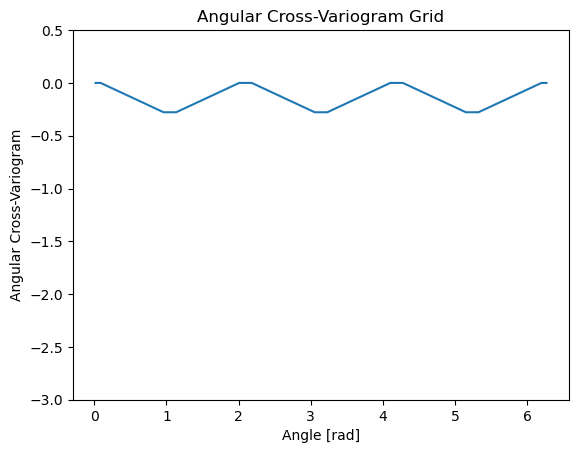

0.0

In [54]:
plot_var_ang_cr(toxic_grid, rotate_grid(toxic_grid,55))[0]

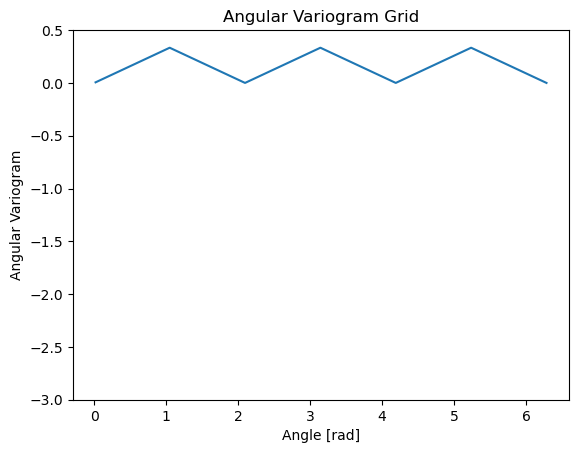

0.005555555555555556

In [55]:
plot_var_ang(toxic_grid)[0]

# Autoregressive Process

Next, we define the function ar_sim, which simulates an autoregressive process *AR*($p$) of length 
n, where param corresponds to a list with the process parameters \[$a_p, a_{p-1}, \ldots, a_1$\] and $p$ is the length of this list.

In [56]:
def ar_sim(n, param):
    p = len(param)
    coef = np.empty(p+1)
    coef[0] = 1
    coef[1:] = -np.array(param)
    roots = np.polynomial.Polynomial(coef).roots()
    norm_roots = [np.linalg.norm(roots[i]) for i in range(p)]
    for i in norm_roots:
        assert i > 1
    
    data = [np.random.normal(0,1) for i in range(p)]
    for i in range(n-p):
        datarev = [data[-i] for i in range(1,p+1)]
        data.append(np.dot(param,datarev) + np.random.normal(0,1))
    return data

Now an example is shown with an AR(1) process with parameter $a_1=0.9$.

In [59]:
grid_autoc = np.empty((m,n))

for i in range(m):
    grid_autoc[i,:] = ar_sim(n,[0.9])

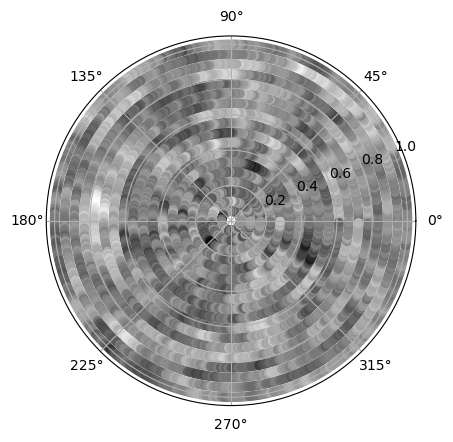

In [60]:
plot_grid(grid_autoc)

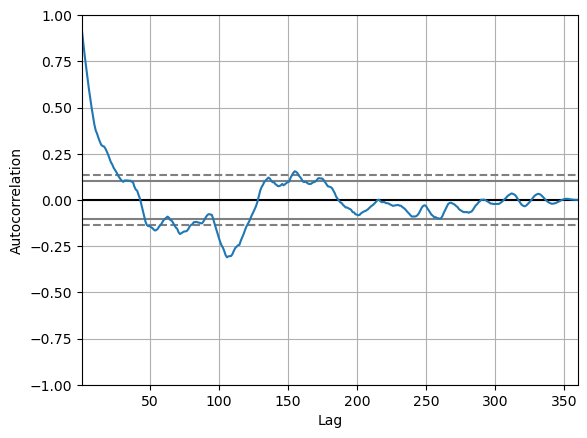

In [62]:
x = pd.plotting.autocorrelation_plot(pd.Series(grid_autoc[2]))

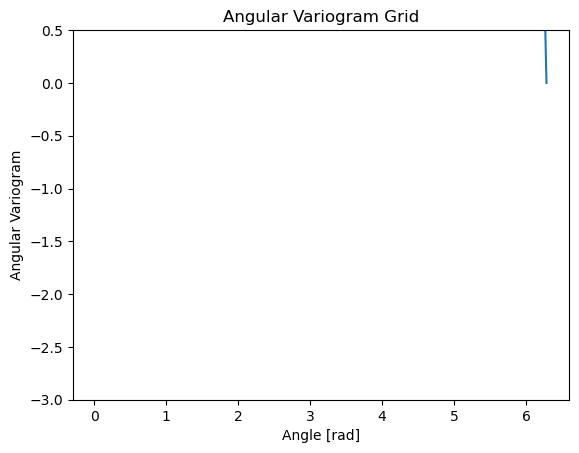

In [63]:
ar1 = plot_var_ang(grid_autoc)[:180]

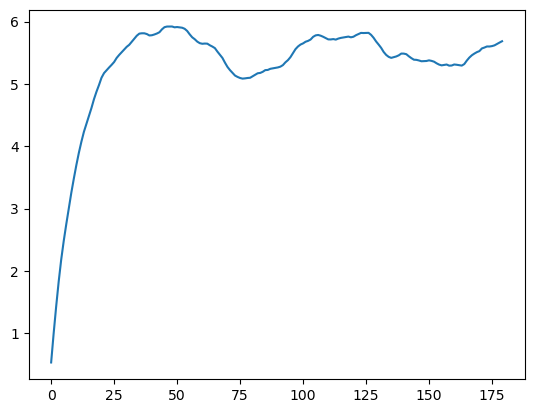

In [64]:
plt.plot(ar1)

In [65]:
ar1_teo = [(1-0.9**t)/(1-0.9**2) for t in range(180)]

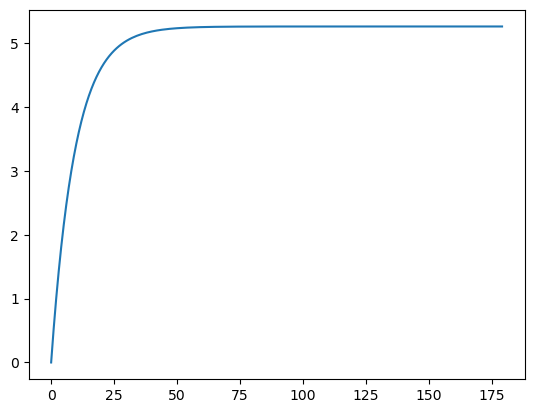

In [66]:
plt.plot(ar1_teo)

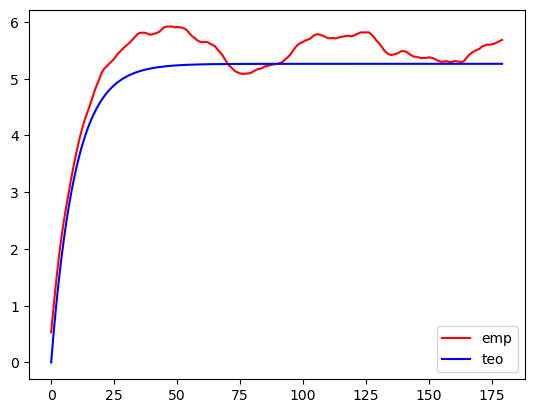

In [67]:
plt.figure()
plt.plot(ar1, color='red', label='emp')
plt.plot(ar1_teo, color='blue', label='teo')
plt.legend()
plt.show()